Start with wave statistics Hs, Td, Dir, h
Also need currents


In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pi = np.pi
sin = np.sin
cos = np.cos
sqrt = np.sqrt
tanh = np.tanh
arcsin = np.arcsin
arccos = np.arccos
exp = np.exp
log = np.log
plot = plt.plot

5.71333705394 1.0598055795
0.361367123907 0.222319865306 2.78022552968
0.222319865306


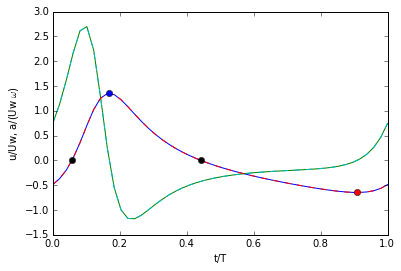

In [11]:
# Check to see the Abreu time series works
# select r and phi to match curves in Figs 1 and 2
r = .8
phi = -pi/4.
Uw = 1.
T = 5.
n = 50
w = 2.*pi/T
wt = np.linspace( 0., 2.*pi, n) # phase
f = sqrt( 1. - r**2 )
numer = sin(wt) + ( r*sin(phi)/(1.+sqrt(1.-r**2)) )
denom = (1.-r*cos(wt+phi))
ut = Uw*f*numer/denom
numer2 = cos(wt)-r*cos(phi)-r**2/(1.+sqrt(1.-r**2))*sin(phi)*sin(wt+phi)
at = Uw*w*f*numer2/denom**2

# alternative formulation Eqns 16a,b in Malarkey & Davies
phi = -phi #
P = sqrt(1.-r*r) # same as f
b = r/(1.+P)
fbt = 1.-b*b
numer = sin(wt)-b*sin(phi)
denom = (1.+b*b-2.*b*cos(wt-phi))
utm = Uw*fbt*numer/denom
numer2 = (1.+b*b)*cos(wt)-2.*b*cos(phi)+2.*b*b*sin(phi)*sin(wt-phi)
atm = Uw*w*fbt*numer2/denom**2

# Appendix E of Malarkey * Davies
# Phase of umax, and umin
c = b*sin(phi)
tmm = arcsin((4.*c*(b*b-c*c)-(1.-b*b)*(1.+b*b-2.*c*c))/((1.+b*b)**2-4.*c*c))
tmp = arcsin((4.*c*(b*b-c*c)+(1.-b*b)*(1.+b*b-2.*c*c))/((1.+b*b)**2-4.*c*c))
if(tmm<0.):
    tmm = tmm+2.*pi
if(tmp<0.):
    tmp = tmp+2*pi
print tmm, tmp
umax = 1+c
umin = umax-2
# zero upcrossing
tz = arcsin(b*sin(phi)) # = arcsin(c)
tzd = 2.*arccos(c)+tz
# sigma Eqn 19
sig1 = arcsin( (4.*c*(b*b-c*c)+(1.-b*b)*(1.+b*b-2.*c*c))/((1.+b*b)**2-4.*c*c) )
if( phi <= 0.5*pi ):
    sig = (1./pi)*(sig1-tz)
else :
    sig = (1./pi)*(pi-sig1-tz)
print tz, sig, tzd
print (tmp-tz)/pi # sigma from Eqn 5

plot(wt/(2.*pi),ut/Uw)
plot(wt/(2.*pi),at/(Uw*w))
plot(wt/(2.*pi),utm/Uw,'--')
plot(wt/(2.*pi),atm/(Uw*w),'--')
plot(tmm/(2.*pi),umin,'or')
plot(tmp/(2.*pi),umax,'ob')
plot(tz/(2.*pi),0,'ok')
plot(tzd/(2.*pi),0,'ok')
plt.xlabel('t/T')
plt.ylabel('u/Uw, a/(Uw $\omega$)')


In [20]:
def ursell( aw, k, h ):
    """
    Calculate Ursell number
    Reussink et al. Eqn 6.
    """
    return (3./4.)*aw*k/(k*h)**3.

def qkhfs( w, h ):
    """
    Quick iterative calculation of kh in gravity-wave dispersion relationship
    kh = qkhfs(w, h )
    
    Input
        w - angular wave frequency = 2*pi/T where T = wave period [1/s]
        h - water depth [m]
    Returns
        kh - wavenumber * depth [ ]

    Orbital velocities from kh are accurate to 3e-12 !

    RL Soulsby (2006) \"Simplified calculation of wave orbital velocities\"
    HR Wallingford Report TR 155, February 2006
    Eqns. 12a - 14
    """
    g = 9.81
    x = w**2.0 *h/g
    y = sqrt(x) * (x<1.) + x *(x>=1.)
    # is this faster than a loop?
    t = tanh( y )
    y = y-( (y*t -x)/(t+y*(1.0-t**2.0)))
    t = tanh( y )
    y = y-( (y*t -x)/(t+y*(1.0-t**2.0)))
    t = tanh( y )
    y = y-( (y*t -x)/(t+y*(1.0-t**2.0)))
    kh = y
    return kh

def Bfit( Ur ):
    """
    Ruessink et al. Eqn. 9
    """
    p1 = 0.
    p2 = 0.857
    p3 = -0.471
    p4 = 0.297
    B = p1 + (p2 - p1)/(1 + exp( (p3-log(Ur))/p4 ))
    return B
    
def Phifit( Ur ):
    # Ruessink et al. eqn 10
    dtr = pi/180.
    p5 = 0.815
    p6 = 0.672
    phi = dtr*(-90.) + dtr*90. * tanh(p5/(Ur**p6))
    return phi # reverse sign for Malarkey & Davies formula

def rfromB ( B ):
    # Solve Ruessink eqn. 11 for r
    b = sqrt(2.)*B/(sqrt(B**2+9)) # use directly in M&D formula
    r = 2.*b/(b**2+1.)
    return r

def abreu_ut ( Uw, r, phi, w ):
    """
    Calculate u(t) and a(t) using Abreu et al. (2010) eqn. 7
    """
    n = 50
    # w = 2.*pi/T
    wt = np.linspace( 0., 2.*pi, n) # phase
    f = sqrt( 1. - r**2 )
    numer = sin(wt) + ( r*sin(phi)/(1.+sqrt(1.-r**2)) )
    denom = (1.-r*cos(wt+phi))
    ut = Uw*f*numer/denom
    numer2 = cos(wt)-r*cos(phi)-r**2/(1.+sqrt(1.-r**2))*sin(phi)*sin(wt+phi)
    at = Uw*w*f*numer2/denom**2
    return wt, ut, at

Hs, T, h:  1.0 10.0 4.0
kh, k, Ur:  0.412300530703 0.103075132676 0.551497424691
B, Phi:  0.340244350447 -0.25385201766
Su, Au: 0.329340278194 -0.0854470547775
r, phi:  0.310846789792 -1.31694430914


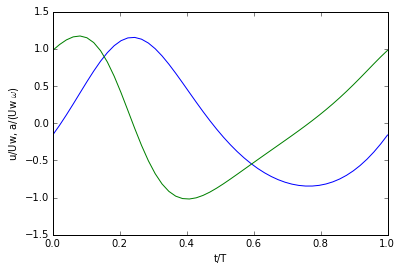

In [21]:
# Input is Hs, T, h
Hs = 1. 
T = 10.
h = 4.

w = 2*pi/T
aw = 0.5*Hs
kh = qkhfs( w, h )
k = kh/h
Ur = ursell( aw, k, h) 
B = Bfit( Ur )
Phi = Phifit( Ur )
r = rfromB( B )
phi = -Phi-pi/2.
Su = B*cos(Phi)
Au = B*sin(Phi)
print "Hs, T, h: ",Hs, T, h
print "kh, k, Ur: ",kh, k, Ur
print "B, Phi: ",B, Phi
print "Su, Au:",Su,Au
print "r, phi: ",r, phi
wt,ut,at = abreu_ut( Uw, r, phi, w )
plot(wt/(2.*pi),ut/Uw)
plot(wt/(2.*pi),at/(Uw*w))
plt.xlabel('t/T')
plt.ylabel('u/Uw, a/(Uw $\omega$)')

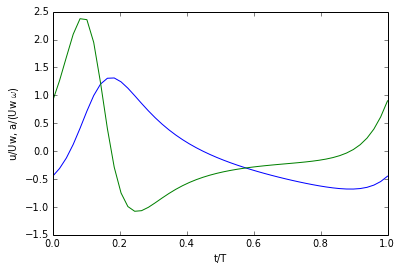

In [42]:
# Check to see the Abreu time series works
# select r and phi to match curves in Figs 1 and 2
r = .75
phi = -pi/4.
Uw = 1.
T = 5.
n = 50
w = 2.*pi/T
wt = linspace( 0., 2.*pi, n) # phase
f = sqrt( 1. - r**2 )
numer = sin(wt) + ( r*sin(phi)/(1.+sqrt(1.-r**2)) )
denom = (1.-r*cos(wt+phi))
ut = Uw*f*numer/denom
numer2 = cos(wt)-r*cos(phi)-r**2/(1.+sqrt(1.-r**2))*sin(phi)*sin(wt+phi)
at = Uw*w*f*numer2/denom**2

plot(wt/(2.*pi),ut/Uw)
plot(wt/(2.*pi),at/(Uw*w))
plt.xlabel('t/T')
plt.ylabel('u/Uw, a/(Uw $\omega$)')